In [1]:
import darts
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('最高気温.csv', encoding="SHIFT-JIS", skiprows=5, index_col=0)

In [3]:
df = df.rename(columns={'Unnamed: 1': '最高温度'})

In [4]:
df['最高温度']

1992/8/26    34.2
1992/8/27    31.3
1992/8/28    33.3
1992/8/29    32.6
1992/8/30    31.7
             ... 
2020/8/22    35.2
2020/8/23    29.4
2020/8/24    32.3
2020/8/25    32.2
2020/8/26    34.0
Name: 最高温度, Length: 10228, dtype: float64

In [5]:
from darts import TimeSeries

In [6]:
df.index = pd.DatetimeIndex(df.index)

In [7]:
series = TimeSeries.from_series(df['最高温度'])

In [8]:
train, val = series.split_after(pd.Timestamp('20100101'))

In [28]:
from darts.models import ExponentialSmoothing, Prophet, TCNModel, AutoARIMA
from darts.metrics.metrics import rmse

In [18]:
model = ExponentialSmoothing(seasonal_periods=365)
model.fit(train)
prediction = model.predict(len(val))

/mnt/c/Users/shunak/project/study/darts/.venv/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 0, 'Year')

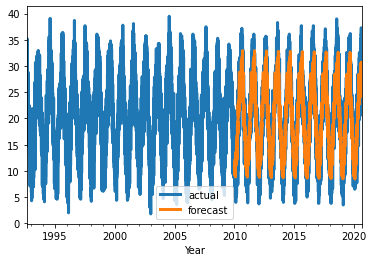

In [19]:
import matplotlib.pyplot as plt

series.plot(label='actual', lw=3)
prediction.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year')

In [20]:
rmse(val, prediction)

3.8880178404777537

In [12]:
model = Prophet()
model.fit(train)
prediction = model.predict(len(val))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Text(0.5, 0, 'Year')

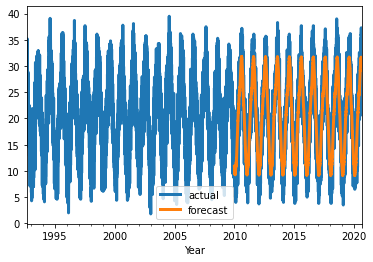

In [13]:
series.plot(label='actual', lw=3)
prediction.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year')

In [16]:
rmse(val, prediction)

3.3649982814926958

In [25]:
model = TCNModel(input_length=365)
model.fit(train)
prediction = model.predict(len(val))

[2020-08-27 16:39:16,110] INFO | darts.models.tcn_model | Number of layers chosen: 7
INFO:darts.models.tcn_model:Number of layers chosen: 7


Text(0.5, 0, 'Year')

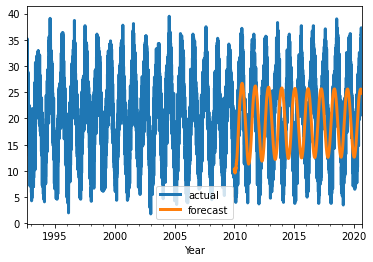

In [26]:
series.plot(label='actual', lw=3)
prediction.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year')

In [27]:
rmse(val, prediction)

9.507120061370241

In [29]:
model = AutoARIMA()
model.fit(train)
prediction = model.predict(len(val))

/mnt/c/Users/shunak/project/study/darts/.venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/mnt/c/Users/shunak/project/study/darts/.venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/mnt/c/Users/shunak/project/study/darts/.venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/mnt/c/Users/shunak/project/study/darts/.venv/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/mnt/c/Users/shunak/project/study/darts/.venv/li

Text(0.5, 0, 'Year')

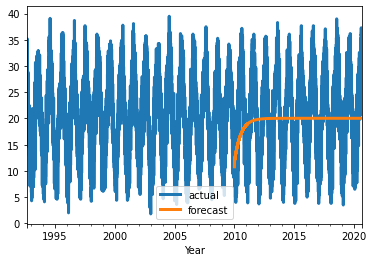

In [30]:
series.plot(label='actual', lw=3)
prediction.plot(label='forecast', lw=3)
plt.legend()
plt.xlabel('Year')

In [31]:
rmse(val, prediction)

8.286888698462649